In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import shapiro,kstest,normaltest
import warnings
warnings.filterwarnings("ignore")
import pickle
import json

# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 1. age

In [5]:
df["age"].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

### 2. sex

In [6]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

### 3. bmi

In [7]:
df["bmi"].value_counts()

32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64

### 4. children 

In [8]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### 5. smoker

In [9]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### 6. region

In [10]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### 7. charges

In [11]:
df["charges"].value_counts()

1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

# Feature Engineering

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1. sex

In [13]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
df["sex"].replace({"male" : 0, "female" : 1},inplace = True)

In [15]:
sex_values = {"male" : 0, "female" : 1}

### 2. smoker

In [16]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
df["smoker"].replace({"no" : 0, "yes" : 1},inplace = True)

In [18]:
smoker_values = {"no" : 0, "yes" : 1}

### 3. region

In [19]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [20]:
df = pd.get_dummies(df, columns = ["region"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


# Feature Selection

### Linearity

In [22]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


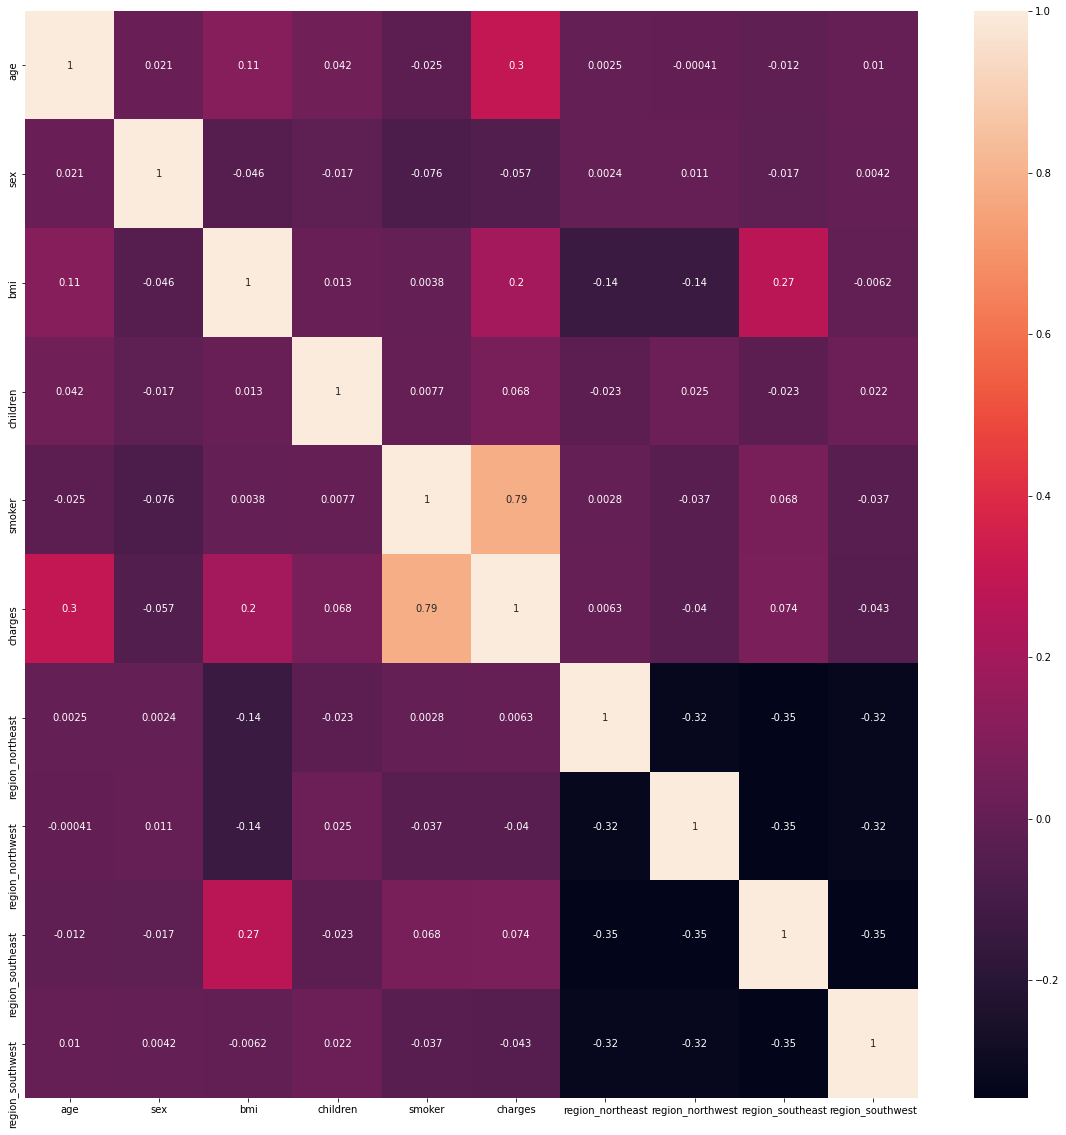

In [23]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

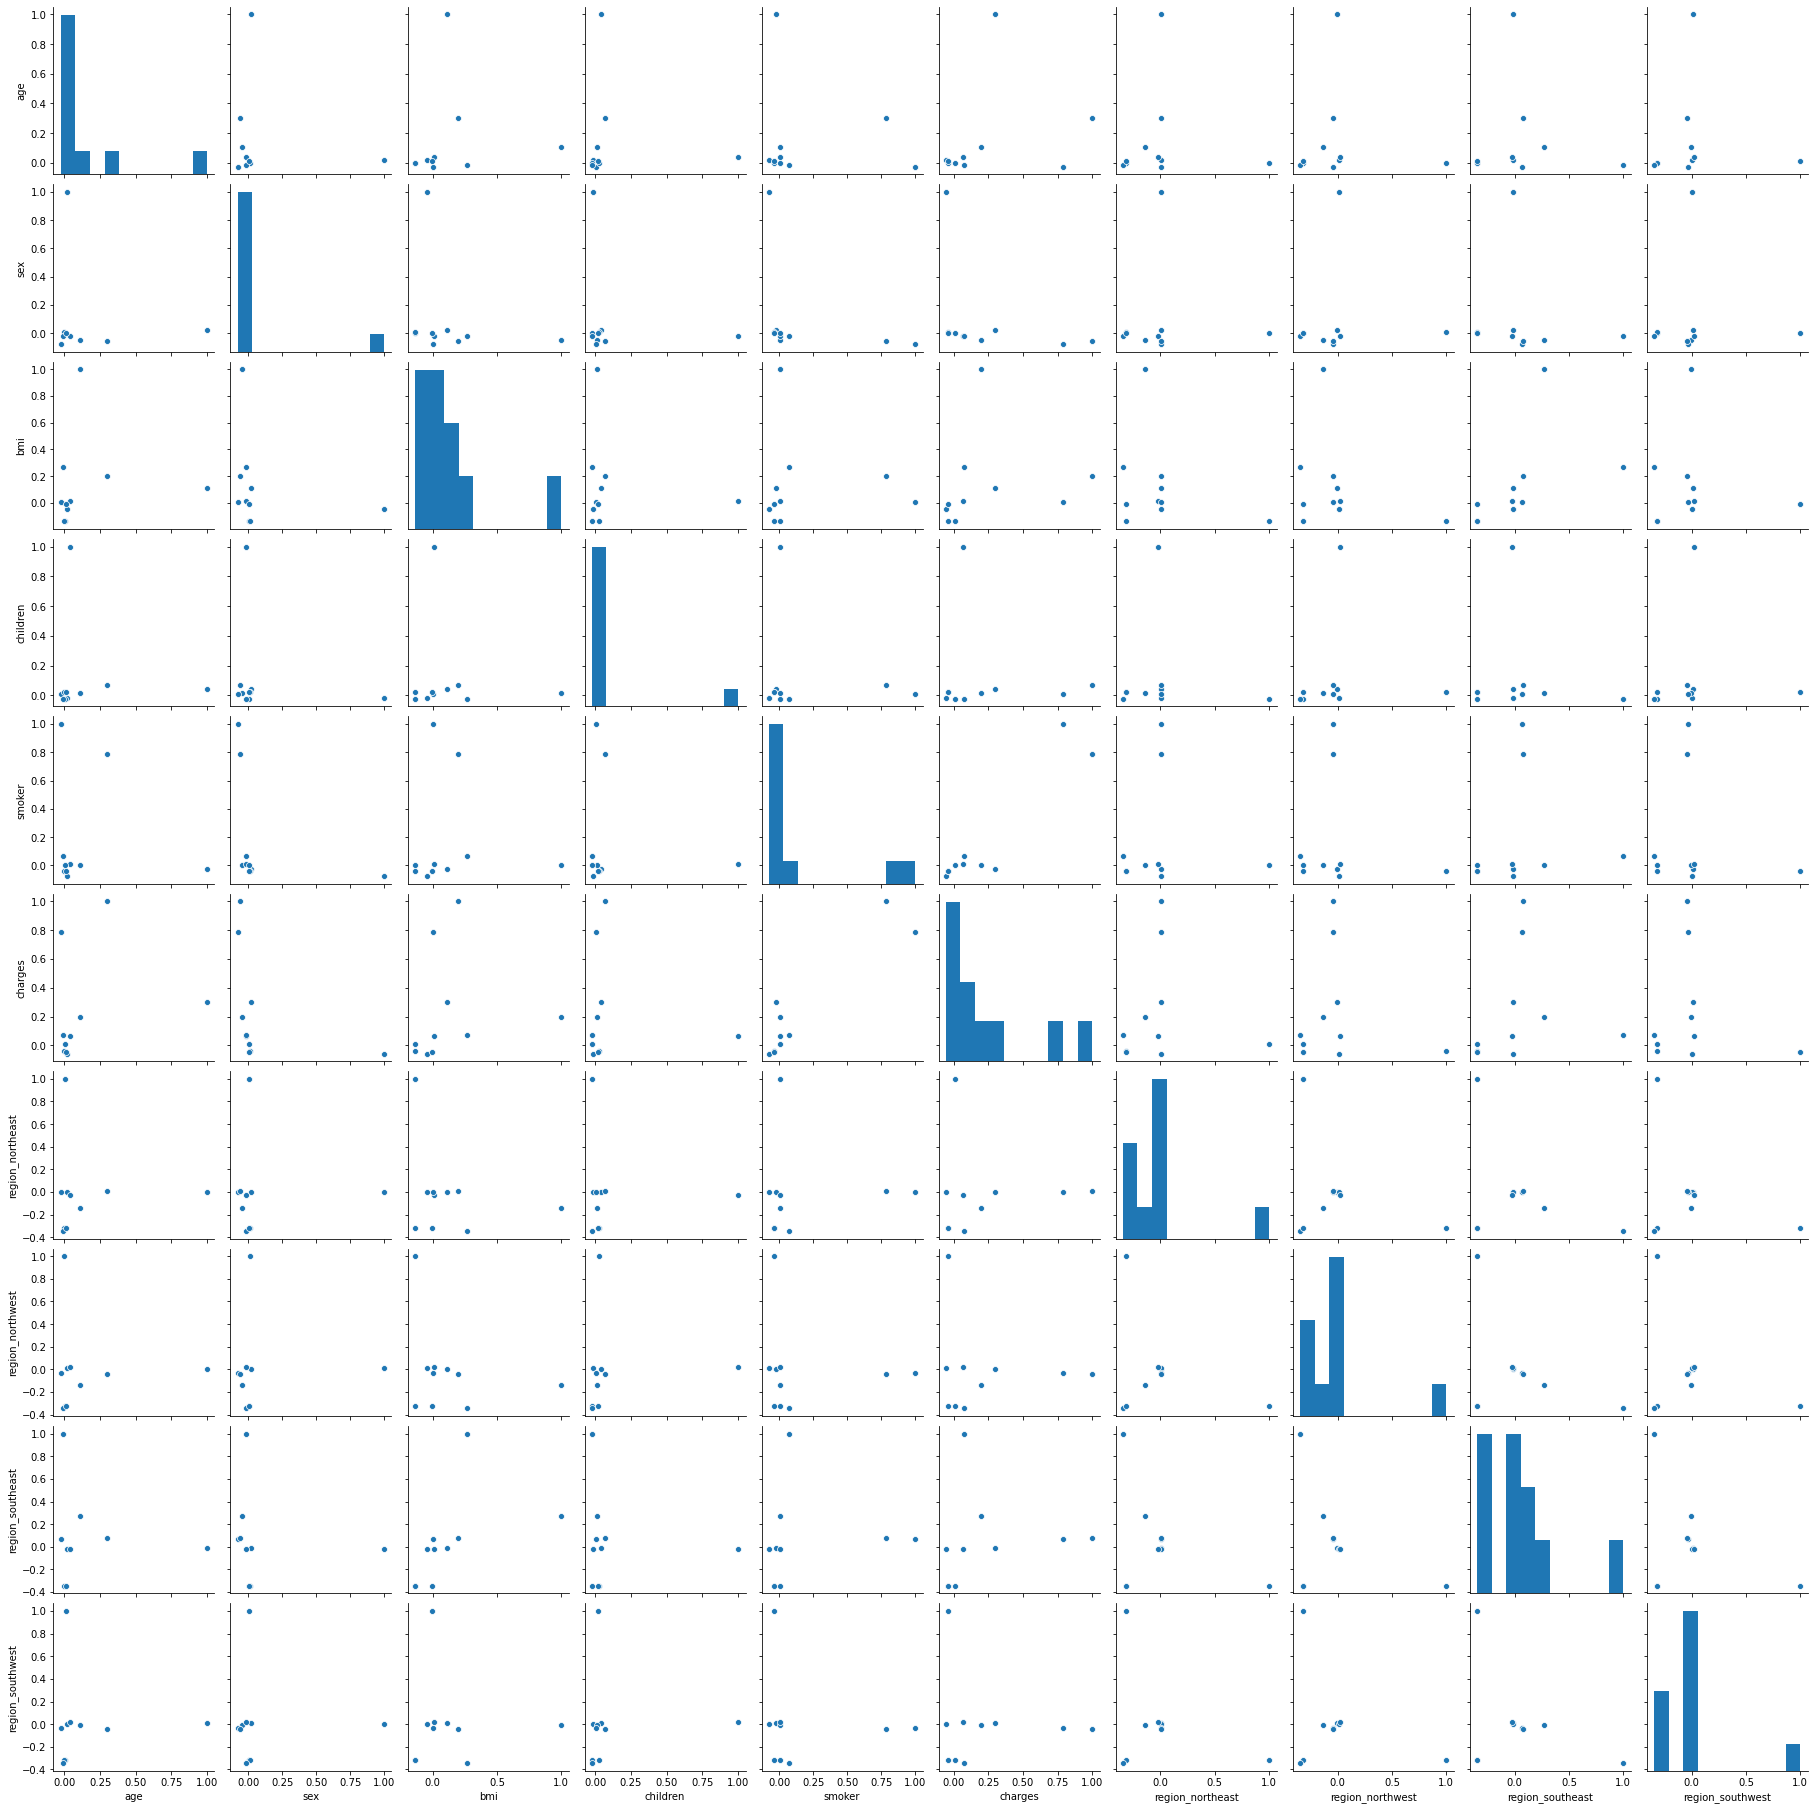

In [24]:
sns.pairplot(df.corr())

### No Multicolinearity

In [25]:
df1 = df.drop("charges",axis = 1)

age                  1.016822
sex                  1.008900
bmi                  1.106630
children             1.004011
smoker               1.012074
region_northeast     8.810362
region_northwest     8.855811
region_southeast    11.779149
region_southwest     9.436480
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


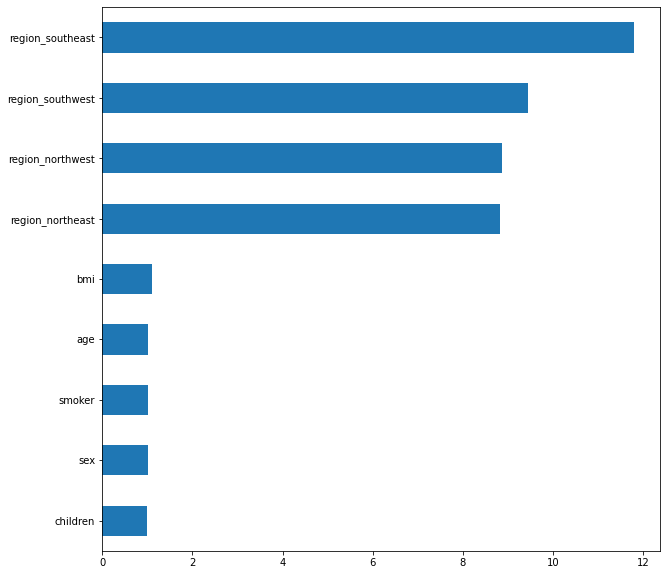

In [26]:
vif_list = []
for i in range (df1.shape[1]) :
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)

s1 = pd.Series(vif_list, index = df1.columns)
print (s1)

plt.figure(figsize = (10,10))
print (s1.sort_values().plot(kind = "barh"))

# Model Training

In [27]:
x = df.drop("charges",axis = 1)
y = df["charges"]

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [29]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


In [30]:
model = LinearRegression()

In [31]:
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

### Training Data

In [32]:
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print ("Mean Squared Error :",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print ("Mean Absolute Error :",mae)

rmse = np.sqrt(mse)
print ("Root Mean Squared Error :",rmse)

r2 = r2_score(y_train,y_pred_train)
print ("R square :",r2)

Mean Squared Error : 36787756.370462015
Mean Absolute Error : 4168.751118732001
Root Mean Squared Error : 6065.291120009164
R square : 0.7477680686451552


### Testing Data

In [33]:
y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print ("Mean Squared Error :",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print ("Mean Absolute Error :",mae)

rmse = np.sqrt(mse)
print ("Root Mean Squared Error :",rmse)

r2 = r2_score(y_test,y_pred_test)
print ("R square :",r2)

Mean Squared Error : 35479352.80730363
Mean Absolute Error : 4051.8587667470424
Root Mean Squared Error : 5956.454717976427
R square : 0.7623311844057112


### Normality of Residual 

In [34]:
residual = y_train - y_pred_train
print (f"Residual :\n\n{residual}")

Residual :

216      -152.777850
731      1570.456482
866     -2908.520768
202      1526.318228
820     -2945.065826
            ...     
715      -154.520421
905     -1090.277658
1096     6960.295370
235    -10268.404722
1061       61.241788
Name: charges, Length: 1070, dtype: float64


#### kdeplot

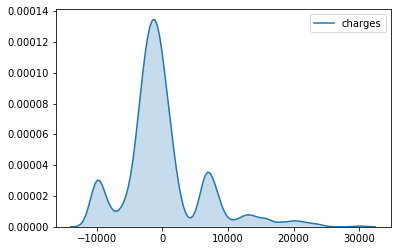

In [35]:
sns.kdeplot(residual, shade = True)

#### Hypothesis Testing

In [36]:
# shapiro test
_,p_value = shapiro(residual)
print (p_value)

if p_value >= 0.05 :
    print ("Null hypothesis accepted")
    print ("Data is Normally Distributed")
else :
    print ("Alternate hypothesis accepted")
    print ("Data is not Normally Distributed")

2.1589200127442617e-26
Alternate hypothesis accepted
Data is not Normally Distributed


In [37]:
# ks test
_,p_value = kstest(residual, "norm")
print (p_value)

if p_value >= 0.05 :
    print ("Null hypothesis accepted")
    print ("Data is Normally Distributed")
else :
    print ("Alternate hypothesis accepted")
    print ("Data is not Normally Distributed")

0.0
Alternate hypothesis accepted
Data is not Normally Distributed


In [38]:
# normal test
_,p_value = normaltest(residual)
print (p_value)

if p_value >= 0.05 :
    print ("Null hypothesis accepted")
    print ("Data is Normally Distributed")
else :
    print ("Alternate hypothesis accepted")
    print ("Data is not Normally Distributed")

3.4090919089141356e-53
Alternate hypothesis accepted
Data is not Normally Distributed


#### QQ Plot

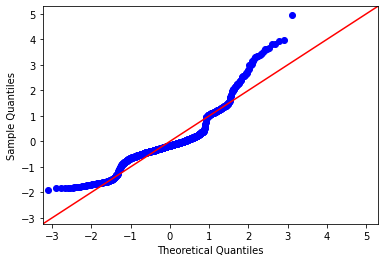

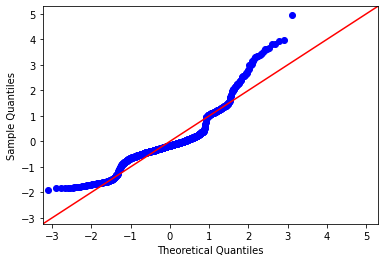

In [39]:
sm.qqplot(residual,line = "45",fit = True)

#### skewness

In [40]:
skew = residual.skew()
print ("Skewness :",skew)

Skewness : 1.2184277295442467


### Homoscadasticity

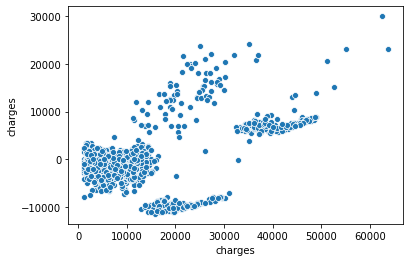

In [41]:
sns.scatterplot(x = y_train, y = residual)

## Find Outlier By Boxplot and IQR Method

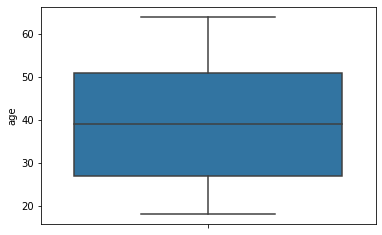

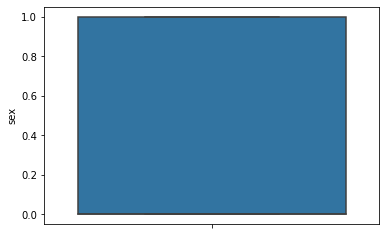

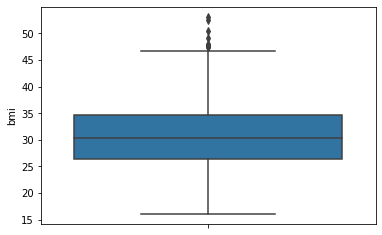

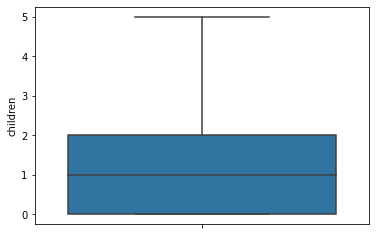

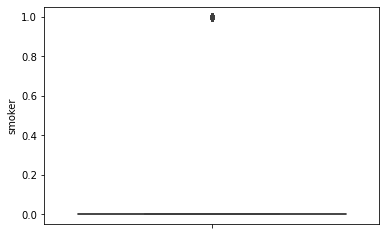

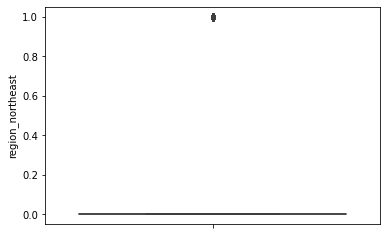

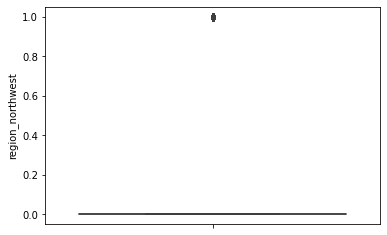

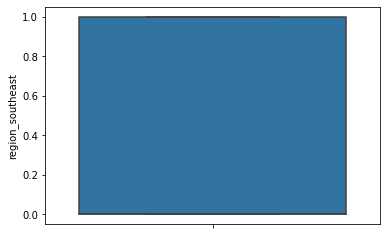

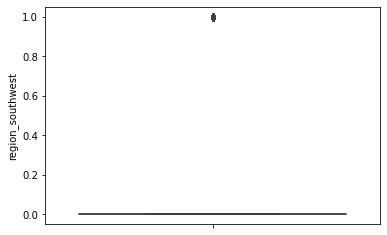

In [42]:
for i in x.columns :
    sns.boxplot (y = df[i])
    plt.show()

### Imputing by Upper Tail

In [43]:
def item_type(x) :
    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.50)
    q3 = df[x].quantile(0.75)

    iqr = q3 - q1

    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    print ("Column Name :",x)
    print ("Q1 :",q1)
    print ("Q2 :",q2)
    print ("Q3 :",q3)
    print ("IQR :",iqr)
    print ("Upper tail :",upper_tail)
    print ("Lower tail :",lower_tail)
    print ()
    print (f"Outliers in Column {x} :\n",df[[x]].loc[df[x] > upper_tail])
    print ()
    df.loc[df[x] > upper_tail, x] = upper_tail
    print (f"Impute Outliers in Column {x} :\n",df.loc[df[x] > upper_tail, x])
    print ()
    print ("*********************************************************************")
    print ()
    
l1 = ['bmi','smoker','region_northeast','region_northwest','region_southwest']
    
for i in l1 :
    item_type(i)

Column Name : bmi
Q1 : 26.29625
Q2 : 30.4
Q3 : 34.69375
IQR : 8.3975
Upper tail : 47.290000000000006
Lower tail : 13.7

Outliers in Column bmi :
         bmi
116   49.06
286   48.07
401   47.52
543   47.41
847   50.38
860   47.60
1047  52.58
1088  47.74
1317  53.13

Impute Outliers in Column bmi :
 Series([], Name: bmi, dtype: float64)

*********************************************************************

Column Name : smoker
Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
IQR : 0.0
Upper tail : 0.0
Lower tail : 0.0

Outliers in Column smoker :
       smoker
0          1
11         1
14         1
19         1
23         1
...      ...
1313       1
1314       1
1321       1
1323       1
1337       1

[274 rows x 1 columns]

Impute Outliers in Column smoker :
 Series([], Name: smoker, dtype: float64)

*********************************************************************

Column Name : region_northeast
Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
IQR : 0.0
Upper tail : 0.0
Lower tail : 0.0

Outliers in Column region_northeast

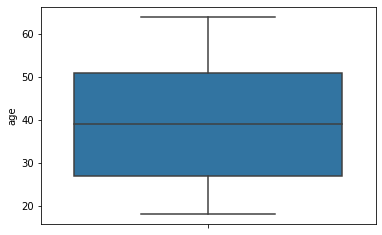

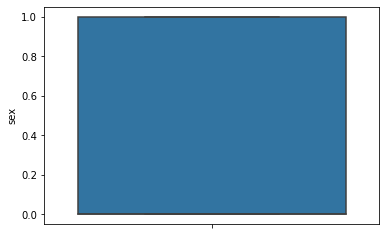

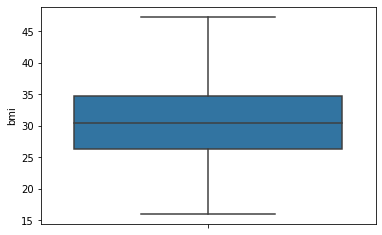

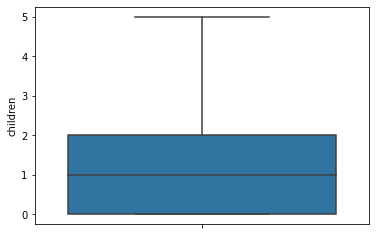

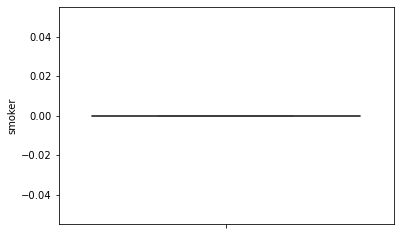

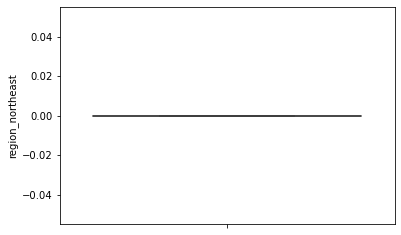

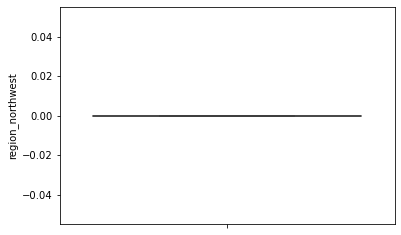

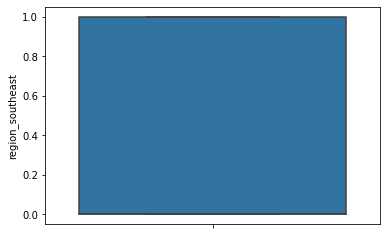

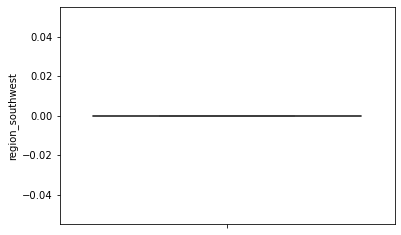

In [44]:
for i in x.columns :
    sns.boxplot (y = df[i])
    plt.show()

In [45]:
# sex_values = {"male" : 0, "female" : 1}
# smoker_values = {"no" : 0, "yes" : 1}

In [46]:
columns_names = x.columns
columns_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [47]:
project_data = {"sex" : sex_values,"smoker" : smoker_values,"columns" : list(columns_names)}
project_data

{'sex': {'male': 0, 'female': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [48]:
with open ("Linear_Regression_Medical_Insurance.pkl","wb") as f:
    pickle.dump(model,f)

In [49]:
with open ("Linear_Regression_Medical_Insurance.json","w") as f:
    json.dump(project_data,f)